### Data Preperation

#### Importing liabraries

In [156]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from numpy import where
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### Functions used to save the classification reports  and also charts of different models

In [157]:
def classification_report_csv(report,file):
    df = pd.DataFrame(report).transpose()
    filename = '../../Output_Metrics/Modelling/'+file+'.csv'
    df.to_csv(filename, index=True)
    print(pd.read_csv(filename, index_col=0))

In [158]:
def chart_png(plt,file):
    filename = '../../Output_Charts/Modelling/'+file+'.png'
    plt.savefig(filename, dpi=300)

#### Importing clean data

In [159]:
market_data= pd.read_csv("../../Input_Data/Modelling/clean_market_data.csv")
print("Market_data - Columns")
print(market_data.columns)
print("Market_data - Row counts")
print(market_data.Response.value_counts())

Market_data - Columns
Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Customer_duration_days'],
      dtype='object')
Market_data - Row counts
0    1903
1     334
Name: Response, dtype: int64


#### Splitting the data to train and test

In [160]:
market_data_X= market_data.drop(labels=["ID","Country","Response"],axis=1)
market_data_Y=market_data["Response"]
print("Market Data X")
display(market_data_X)
print("Market Data Y")
print(market_data_Y)

Market Data X


,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Customer_duration_days
0,44,3,2,84835.0,0,0,0,189,104,379,...,4,6,1,0,0,0,0,0,0,3088
1,53,3,1,57091.0,0,0,0,464,5,64,...,3,7,5,0,0,0,0,1,0,3089
2,56,3,4,67267.0,0,1,0,134,11,59,...,2,5,2,0,0,0,0,0,0,3122
3,47,3,4,32474.0,1,1,0,10,0,1,...,0,2,7,0,0,0,0,0,0,3124
4,25,3,1,21474.0,1,0,0,6,16,24,...,1,2,7,1,0,0,0,0,0,3157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,40,3,4,51381.5,0,0,87,445,37,359,...,4,8,1,0,0,0,0,0,0,3293
2233,54,3,4,51381.5,1,1,87,19,4,12,...,0,3,5,0,0,0,0,0,0,3739
2234,58,3,1,51381.5,0,1,95,264,0,21,...,1,5,7,0,0,0,0,0,0,3329
2235,63,3,1,51381.5,2,1,96,48,5,48,...,1,4,6,0,0,0,0,0,0,3254


Market Data Y
0       1
1       1
2       0
3       0
4       1
       ..
2232    0
2233    0
2234    0
2235    0
2236    0
Name: Response, Length: 2237, dtype: int64


In [161]:
#Training and Test Data splitting
X_train,X_test,y_train,y_test = train_test_split(market_data_X,market_data_Y,test_size=0.2,random_state=0)

print('X train shape: {}'.format(X_train.shape))
print('X test shape: {}'.format(X_test.shape))
print('Y train shape: {}'.format(y_train.shape))
print('Y test shape: {}'.format(y_test.shape))
print("No of customers accepted the offer in the last campaign i.e 1's {} in training data".format(y_train.value_counts()[1]))
print("No of customers did not accept the offer in the last campaign i.e 0's {} in training data".format(y_train.value_counts()[0]))
print("No of customers accepted the offer in the last campaign i.e 1's {} in test data".format(y_test.value_counts()[1]))
print("No of customers did not accept the offer in the last campaign i.e 0's {} in test data".format(y_test.value_counts()[0]))

X train shape: (1789, 25)
X test shape: (448, 25)
Y train shape: (1789,)
Y test shape: (448,)
No of customers accepted the offer in the last campaign i.e 1's 273 in training data
No of customers did not accept the offer in the last campaign i.e 0's 1516 in training data
No of customers accepted the offer in the last campaign i.e 1's 61 in test data
No of customers did not accept the offer in the last campaign i.e 0's 387 in test data


#### Applying decision tree algorithm 

In [162]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 24,random_state=42)
clf.fit(X_train,y_train)
y_predict= clf.predict(X_test)
result_metrics = classification_report(y_test, y_predict, output_dict=True)
classification_report_csv(result_metrics,"DecisionTree_Pilot_version_Report")

              precision    recall  f1-score     support
0              0.922078  0.917313  0.919689  387.000000
1              0.492063  0.508197  0.500000   61.000000
accuracy       0.861607  0.861607  0.861607    0.861607
macro avg      0.707071  0.712755  0.709845  448.000000
weighted avg   0.863527  0.861607  0.862544  448.000000


Score:0.8616071428571429


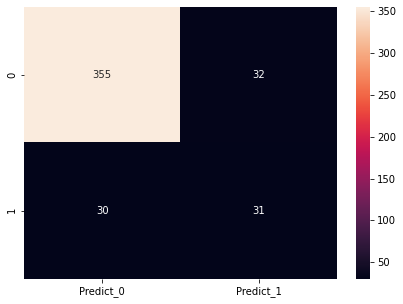

In [163]:
print("Score:{}".format(clf.score(X_test, y_test)))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ["Predict_0","Predict_1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

plt.show()

#### In the training data there are total of 1789 in which 1516 are 0's and 273 are 1's 
#### In testing data we have total of 448 records in which 387 are 0's and 61 are 1's
#### Using the decision tree model 355 records in test data are predicted as 0's correctly and 31 are predicted as 1's correctly with an accuracy score of 86%
#### However this model wouldn't perform well on unknown data in the future as the data used for modelling is imbalanced, precision and recall for the customers who accepted the offer is very less i.e just 13 % of the whole data for the positive predictions

### Using different sampling techniques to check which sampled data works well on test data

#### Using Random Over Sampler

In [164]:
ros = RandomOverSampler(random_state=30)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print("Counter after Random Over Sampler",Counter(y_resampled).items())
print("Y Train:\n",y_train.value_counts())
print("Y Resampled:\n",y_resampled.value_counts())
print("Shape after resampling X_train:{}".format(X_resampled.shape))
print("Shape after resampling y_train:{}".format(y_resampled.shape))
print("No of customers accepted the offer in the last campaign i.e 1's {} in resampled train data".format(y_resampled.value_counts()[1]))
print("No of customers did not accept the offer in the last campaign i.e 0's {} in resampled train data".format(y_resampled.value_counts()[0]))

Counter after Random Over Sampler dict_items([(0, 1516), (1, 1516)])
Y Train:
 0    1516
1     273
Name: Response, dtype: int64
Y Resampled:
 1    1516
0    1516
Name: Response, dtype: int64
Shape after resampling X_train:(3032, 25)
Shape after resampling y_train:(3032,)
No of customers accepted the offer in the last campaign i.e 1's 1516 in resampled train data
No of customers did not accept the offer in the last campaign i.e 0's 1516 in resampled train data


In [165]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 24,random_state=42)
clf.fit(X_resampled,y_resampled)
y_predict= clf.predict(X_test)
result_metrics = classification_report(y_test, y_predict, output_dict=True)
classification_report_csv(result_metrics,"Decision_Tree_Random_Over_Sampler_Report")

              precision    recall  f1-score     support
0              0.931759  0.917313  0.924479  387.000000
1              0.522388  0.573770  0.546875   61.000000
accuracy       0.870536  0.870536  0.870536    0.870536
macro avg      0.727073  0.745542  0.735677  448.000000
weighted avg   0.876018  0.870536  0.873064  448.000000


#### Precision and Recall for Class 1 is very low, just around 50%
#### There is an oversampling issue still, even after using RandomOverSampler
#### Will try using SMOTE for manipulating tuples for sample (Synthetic Minority Oversampling Technique)

In [166]:
counter = Counter(y_train)
print("Counter before Smote:-\t",counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
counter = Counter(y)
print("Counter after Smote:-\t",counter)
print("Counter items :-\t", counter.items())
print("Counter keys :-\t\t", counter.keys())

Counter before Smote:-	 Counter({0: 1516, 1: 273})
Counter after Smote:-	 Counter({0: 1516, 1: 1516})
Counter items :-	 dict_items([(0, 1516), (1, 1516)])
Counter keys :-		 dict_keys([0, 1])


In [167]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 24,random_state=42)
clf.fit(X,y)
y_predict= clf.predict(X_test)
result_metrics = classification_report(y_test, y_predict)
print("Result Matrix of Decision Tree after using SMOTE")
print(result_metrics)


Result Matrix of Decision Tree after using SMOTE
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       387
           1       0.40      0.57      0.47        61

    accuracy                           0.83       448
   macro avg       0.67      0.72      0.68       448
weighted avg       0.86      0.83      0.84       448



#### Using SMOTE to oversample the minority class and then use Random under sampler to undersample the majority class 

In [168]:
counter = Counter(y_train)
print("Counter before Smote and Random Under Sampler:-\n",counter)
over = SMOTE(sampling_strategy = "minority")
under = RandomUnderSampler(sampling_strategy = "not minority")
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y)
print("Counter after Smote and Random Under Sampler:-\n",counter)
print("X Shape",X.shape)

Counter before Smote and Random Under Sampler:-
 Counter({0: 1516, 1: 273})
Counter after Smote and Random Under Sampler:-
 Counter({0: 1516, 1: 1516})
X Shape (3032, 25)


In [169]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 24,random_state=42)
clf.fit(X,y)
y_predict= clf.predict(X_test)
result_metrics = classification_report(y_test, y_predict, output_dict=True)
print("Result Matrix of Decision Tree after using SMOTE and Random Under Sampler")
classification_report_csv(result_metrics,"DecisionTree_SMOTE_and_RandomUnderSampler_Report")

Result Matrix of Decision Tree after using SMOTE and Random Under Sampler
              precision    recall  f1-score     support
0              0.936288  0.873385  0.903743  387.000000
1              0.436782  0.622951  0.513514   61.000000
accuracy       0.839286  0.839286  0.839286    0.839286
macro avg      0.686535  0.748168  0.708628  448.000000
weighted avg   0.868275  0.839286  0.850609  448.000000


In [170]:
clf_CVV = DecisionTreeClassifier(criterion='entropy', max_depth = 20,random_state=42)
kvalues =[3,5,7,10]

for k in kvalues:
    kff = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 
    kff.get_n_splits(X)
    print("KFold begins for K value:", k)

    for train_index, valid_index in kff.split(X,y):

        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        clf_CVV.fit(X_train, y_train)
        y_pred_valid =clf_CVV.predict(X_valid)
        y_pred_train=clf_CVV.predict(X_train)
    
        result_metrics_valid = classification_report(y_valid, y_pred_valid, output_dict=True)
        result_metrics_train = classification_report(y_train, y_pred_train, output_dict=True)
        
        print("==> Result Matrix after using KFolds on KFold Training Data with K value", k)
        classification_report_csv(result_metrics_train,"KFold-DecisionTree Classifier -Training Data witk k - "+str(k))
        print("\n")
        print("==> Result Matrix after using KFolds on KFold Validation Data with K value", k)
        classification_report_csv(result_metrics_valid,"KFold-DecisionTree Classifier -validation Data witk k - "+str(k))
        print("\n")

KFold begins for K value: 3
==> Result Matrix after using KFolds on KFold Training Data with K value 3
              precision    recall  f1-score      support
0              0.998010  0.999004  0.998507  1004.000000
1              0.999016  0.998033  0.998524  1017.000000
accuracy       0.998516  0.998516  0.998516     0.998516
macro avg      0.998513  0.998519  0.998516  2021.000000
weighted avg   0.998516  0.998516  0.998516  2021.000000


==> Result Matrix after using KFolds on KFold Validation Data with K value 3
              precision    recall  f1-score      support
0              0.888655  0.826172  0.856275   512.000000
1              0.833645  0.893788  0.862669   499.000000
accuracy       0.859545  0.859545  0.859545     0.859545
macro avg      0.861150  0.859980  0.859472  1011.000000
weighted avg   0.861504  0.859545  0.859431  1011.000000


==> Result Matrix after using KFolds on KFold Training Data with K value 3
              precision    recall  f1-score      support


==> Result Matrix after using KFolds on KFold Training Data with K value 7
              precision    recall  f1-score      support
0              0.993088  0.999227  0.996148  1294.000000
1              0.999229  0.993103  0.996157  1305.000000
accuracy       0.996152  0.996152  0.996152     0.996152
macro avg      0.996158  0.996165  0.996152  2599.000000
weighted avg   0.996171  0.996152  0.996152  2599.000000


==> Result Matrix after using KFolds on KFold Validation Data with K value 7
              precision    recall  f1-score     support
0              0.893720  0.833333  0.862471  222.000000
1              0.836283  0.895735  0.864989  211.000000
accuracy       0.863741  0.863741  0.863741    0.863741
macro avg      0.865001  0.864534  0.863730  433.000000
weighted avg   0.865731  0.863741  0.863698  433.000000


==> Result Matrix after using KFolds on KFold Training Data with K value 7
              precision    recall  f1-score      support
0              0.991603  0.999231 

==> Result Matrix after using KFolds on KFold Training Data with K value 10
              precision    recall  f1-score      support
0              0.991247  0.999265  0.995240  1360.000000
1              0.999264  0.991234  0.995233  1369.000000
accuracy       0.995236  0.995236  0.995236     0.995236
macro avg      0.995255  0.995250  0.995236  2729.000000
weighted avg   0.995269  0.995236  0.995236  2729.000000


==> Result Matrix after using KFolds on KFold Validation Data with K value 10
              precision    recall  f1-score     support
0              0.885906  0.846154  0.865574  156.000000
1              0.844156  0.884354  0.863787  147.000000
accuracy       0.864686  0.864686  0.864686    0.864686
macro avg      0.865031  0.865254  0.864681  303.000000
weighted avg   0.865651  0.864686  0.864707  303.000000


==> Result Matrix after using KFolds on KFold Training Data with K value 10
              precision    recall  f1-score      support
0              0.992738  0.9992

#### Building learning curve to understand how the model performs on trainning and validation data

In [171]:
train_sizes = np.linspace(0.01,1.0,10)  # 5 times 5*3 = 15
train_sizes, train_accuracy, test_accuracy = learning_curve(clf_CVV, X, y, train_sizes = train_sizes, scoring = 'accuracy', cv=10, shuffle=True)
print("Training Sizes \n", train_sizes)
print("\n")
print("Training Accuracy \n", train_accuracy)
print("\n")
print("Testing Accuracy \n",test_accuracy)

Training Sizes 
 [  27  327  627  927 1227 1527 1827 2127 2427 2728]


Training Accuracy 
 [[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         0.99082569 0.99388379 1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         0.99521531 0.99681021 1.         0.9984051
  0.9984051  0.99681021 0.9984051  1.        ]
 [0.99892125 1.         0.99568501 0.99568501 0.99892125 0.99892125
  0.9978425  0.9978425  0.99892125 1.        ]
 [0.99755501 0.999185   0.99674002 0.99592502 0.99837001 0.99837001
  0.99674002 0.99674002 0.99674002 0.99837001]
 [0.99803536 0.99869024 0.99672561 0.99607073 0.99803536 0.99803536
  0.99607073 0.99672561 0.99672561 0.99803536]
 [0.99726327 0.99671593 0.99562124 0.99616858 0.99726327 0.99726327
  0.99616858 0.99671593 0.99671593 0.99835796]
 [0.99670898 0.99529854 0.99529854 0.99529854 0.99623883 0.99670898
  0.99670898 0.99623883 0.99623883 0.99764927]
 [0.99

In [172]:
train_scores_mean = np.mean(train_accuracy, axis=1)
test_scores_mean = np.mean(test_accuracy, axis=1)

print("Mean of Training Scores", train_scores_mean)
print("Mean of Testing Scores", test_scores_mean)

Mean of Training Scores [1.         0.99847095 0.9984051  0.998274   0.99747351 0.997315
 0.9968254  0.99623883 0.99596209 0.99556452]
Mean of Testing Scores [0.65070783 0.74637832 0.79681909 0.81396344 0.82815051 0.83210657
 0.83408568 0.85685361 0.86179651 0.85817809]


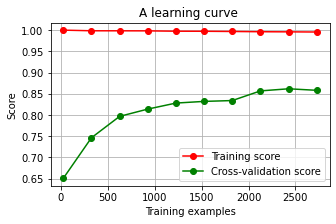

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve ')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
ax.grid()

ax.plot(train_sizes,train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes,test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")
chart_png(plt,"Cross Validation - Learning Curve for Decission tree classifier")
plt.show()

#### Performing hyper parameter tuning for the depth and criterion of the Decision tree algorithm using Grid search CV to get the best score and parameters for the training data

In [176]:
# a function to plot a bar graph of important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

In [181]:
param_grid = {"max_depth":np.arange(3,24,1),"criterion":["entropy","gini"]}
kff_clf = KFold(n_splits=10,random_state=42, shuffle=True)
clf_grid_cv = DecisionTreeClassifier()
grid_search_cv= GridSearchCV(clf_grid_cv,param_grid,cv=kff_clf)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_,grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 17} 0.867744702101789


#### Using the best criteria entropy and max_depth as 17

In [182]:
clf_best_param=  DecisionTreeClassifier(criterion='entropy', max_depth = 17, random_state=42)

In [183]:
clf_best_param.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=17, random_state=42)

In [184]:
print('Feature importances: {}'.format(clf_best_param.feature_importances_))

Feature importances: [0.04852154 0.0162534  0.1346061  0.07255187 0.00457654 0.03874449
 0.12329185 0.07991108 0.02730764 0.06038479 0.03182452 0.02698536
 0.10640178 0.01461894 0.01419929 0.01895416 0.0855018  0.02266682
 0.00265881 0.0016973  0.00754889 0.0002527  0.00200759 0.
 0.05853274]


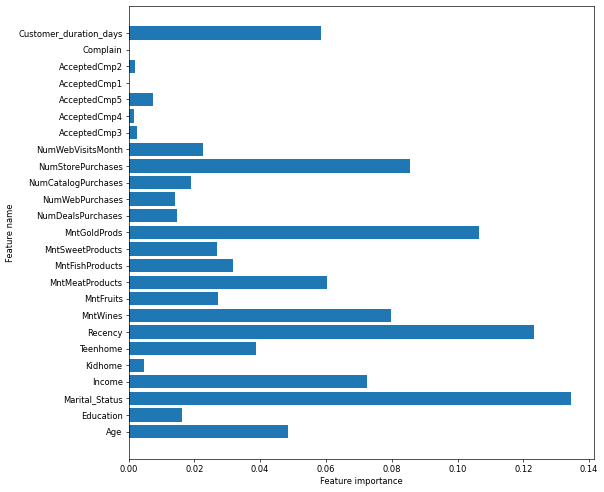

In [185]:
plt.figure(figsize=(10,10), dpi=60)
plot_feature_importances(clf_best_param, X.columns)
chart_png(plt,"Feature_Importance_chart_Decission tree classifier")

In [186]:

y_pred_test =clf_best_param.predict(X_test)
result_metrics_test = classification_report(y_test, y_pred_test, output_dict=True)
print("Result Matrix after using Cross Validation on Test")
classification_report_csv(result_metrics_test,"Decision_Tree_Classifier_Testing_Classification_Report")

Result Matrix after using Cross Validation on Test
              precision    recall  f1-score     support
0              0.944444  0.878553  0.910308  387.000000
1              0.465909  0.672131  0.550336   61.000000
accuracy       0.850446  0.850446  0.850446    0.850446
macro avg      0.705177  0.775342  0.730322  448.000000
weighted avg   0.879287  0.850446  0.861294  448.000000


#### Confusion matrix for decision tree classifier

y values in test set
0    387
1     61
Name: Response, dtype: int64


Confusion Matrix for Decision Tree Classifier


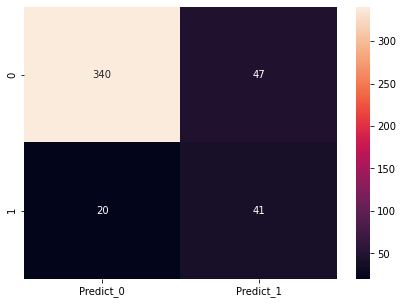

In [187]:
print('y values in test set')
print(y_test.value_counts())
print("\n")
print("Confusion Matrix for Decision Tree Classifier")

cm_clf=metrics.confusion_matrix(y_test, y_pred_test,labels=[0,1])

df_cm_clf = pd.DataFrame(cm_clf, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict_0","Predict_1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_clf, annot=True ,fmt='g')
chart_png(plt,"Confusion_Matrix_Decision_Tree_Classifier")
plt.show()

#### K Nearest Neighbours

#### Applying K nearest neighbor algorithm on the sampled data obtained by SMOTE and undersampling techniques

In [188]:
KNN = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
KNN.fit(X, y)
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7276785714285714

####  Cross validation for the K nearest neighbor algorithm

In [189]:
kvalues =[3,5,7,10]
for k in kvalues:
    kfold = KFold(n_splits=k, random_state=None, shuffle=True) # Define the split - into 2 folds 

    kfold.get_n_splits(X)
    print("===========================================================================")
    print("KFold begins for K value:", k)
    for train_index, valid_index in kfold.split(X,y):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        KNN.fit(X_train, y_train)

        y_pred_valid =KNN.predict(X_valid)
        y_pred_train =KNN.predict(X_train)

        result_metrics_train = classification_report(y_train, y_pred_train, output_dict=True)
        result_metrics_valid = classification_report(y_valid, y_pred_valid, output_dict=True)

        print("==> Result Matrix after using KFolds on KFold Training Data with k value", k)
        classification_report_csv(result_metrics_train,"KFold - KNN - Training Data with k- "+ str(k))
        print("\n")
        print("==> Result Matrix after using KFolds on KFold validation Data with K  value", k)
        classification_report_csv(result_metrics_valid,"KFold - KNN - Validation Data with K - "+str(k))
        print("\n")


KFold begins for K value: 3
==> Result Matrix after using KFolds on KFold Training Data with k value 3
              precision    recall  f1-score      support
0              0.993289  1.000000  0.996633  1036.000000
1              1.000000  0.992893  0.996434   985.000000
accuracy       0.996536  0.996536  0.996536     0.996536
macro avg      0.996644  0.996447  0.996534  2021.000000
weighted avg   0.996560  0.996536  0.996536  2021.000000


==> Result Matrix after using KFolds on KFold validation Data with K  value 3
              precision    recall  f1-score      support
0              0.879310  0.743750  0.805869   480.000000
1              0.796694  0.907721  0.848592   531.000000
accuracy       0.829871  0.829871  0.829871     0.829871
macro avg      0.838002  0.825736  0.827230  1011.000000
weighted avg   0.835918  0.829871  0.828308  1011.000000


==> Result Matrix after using KFolds on KFold Training Data with k value 3
              precision    recall  f1-score      support

==> Result Matrix after using KFolds on KFold Training Data with k value 7
              precision    recall  f1-score      support
0              0.990189  0.999238  0.994693  1313.000000
1              0.999215  0.989891  0.994531  1286.000000
accuracy       0.994613  0.994613  0.994613     0.994613
macro avg      0.994702  0.994565  0.994612  2599.000000
weighted avg   0.994655  0.994613  0.994613  2599.000000


==> Result Matrix after using KFolds on KFold validation Data with K  value 7
              precision    recall  f1-score     support
0              0.898810  0.743842  0.814016  203.000000
1              0.803774  0.926087  0.860606  230.000000
accuracy       0.840647  0.840647  0.840647    0.840647
macro avg      0.851292  0.834965  0.837311  433.000000
weighted avg   0.848329  0.840647  0.838764  433.000000


==> Result Matrix after using KFolds on KFold Training Data with k value 7
              precision    recall  f1-score      support
0              0.992384  1.000000

==> Result Matrix after using KFolds on KFold Training Data with k value 10
              precision    recall  f1-score      support
0              0.993445  0.999267  0.996348  1365.000000
1              0.999263  0.993402  0.996324  1364.000000
accuracy       0.996336  0.996336  0.996336     0.996336
macro avg      0.996354  0.996335  0.996336  2729.000000
weighted avg   0.996353  0.996336  0.996336  2729.000000


==> Result Matrix after using KFolds on KFold validation Data with K  value 10
              precision    recall  f1-score    support
0              0.873950  0.688742  0.770370  151.00000
1              0.744565  0.901316  0.815476  152.00000
accuracy       0.795380  0.795380  0.795380    0.79538
macro avg      0.809257  0.795029  0.792923  303.00000
weighted avg   0.809044  0.795380  0.792998  303.00000


==> Result Matrix after using KFolds on KFold Training Data with k value 10
              precision    recall  f1-score      support
0              0.992663  0.999261  0

### Building learning curve to understand how the model performs on trainning and validation data

In [190]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.01,1.0,10)  # 5 times 5*3 = 15

train_sizes, train_accuracy, test_accuracy = learning_curve(KNN, X, y, 
                            train_sizes = train_sizes, 
                            scoring = 'accuracy',
                                                 cv=10, shuffle=True)

In [191]:

print("Trainning data Sizes")
print("\n")
print(train_sizes)
print("\n")
print("Trainning Accuracy for each data size with in each fold")
print("\n")
print(train_accuracy)
print("\n")
print("Validation data accuracy for each data size with in each fold")
print("\n")
print(test_accuracy)

Trainning data Sizes


[  27  327  627  927 1227 1527 1827 2127 2427 2728]


Trainning Accuracy for each data size with in each fold


[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         0.9969419  0.9969419 ]
 [0.9984051  0.9984051  0.9984051  1.         1.         1.
  0.9984051  1.         0.9984051  0.9984051 ]
 [0.9978425  0.9978425  0.9978425  0.99892125 0.99892125 0.9978425
  0.99676375 0.99892125 0.99676375 0.9978425 ]
 [0.99755501 0.99755501 0.99674002 0.999185   0.99837001 0.99837001
  0.99755501 0.99837001 0.99674002 0.99837001]
 [0.99803536 0.99607073 0.99672561 0.99738048 0.99738048 0.99738048
  0.99738048 0.99738048 0.99672561 0.99803536]
 [0.99835796 0.99562124 0.99726327 0.99616858 0.99671593 0.99726327
  0.99726327 0.99726327 0.99562124 0.99781062]
 [0.99811942 0.99576869 0.99576869 0.99529854 0.99717913 0.99623883
  0.99670898 0.99

In [192]:
train_scores_mean=np.mean(train_accuracy, axis=1)

test_scores_mean = np.mean(test_accuracy, axis=1)

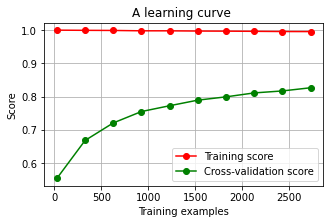

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve ')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
ax.grid()

ax.plot(train_sizes,train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes,test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")
chart_png(plt,"Cross Validation - Learning Curve for KNN")
plt.show()


#### Hyper parameter tuning of k value for k nearest neighbors algorithm


In [194]:
param_grid = {"n_neighbors":np.arange(3,20,2),"weights":['distance']}
kff_KNN = KFold(n_splits=10, random_state=None, shuffle=True)
KNN_grid_cv = KNeighborsClassifier()
grid_search_cv_KNN= GridSearchCV(KNN_grid_cv,param_grid,cv=kff_KNN)
grid_search_cv_KNN.fit(X,y)
print("Best Params")
print(grid_search_cv_KNN.best_params_,grid_search_cv_KNN.best_score_)

Best Params
{'n_neighbors': 3, 'weights': 'distance'} 0.8238883098836199


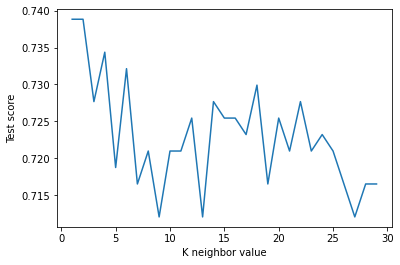

In [195]:
scores =[]
for k in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN.fit(X, y)
    scores.append(KNN.score(X_test, y_test))
plt.plot(range(1,30),scores)
plt.xlabel("K neighbor value")
plt.ylabel("Test score")
chart_png(plt,"KNN - K value Tuning Score")
plt.show()

### Here the test score does not have any significant change for different k values, if we choose 3 or 12 there is just 1 % decrease in the test accuracy score. So we can just take the best parameters generated by GridSearch CV technique

### KNN model with best 3 as k value

In [196]:
KNN_best=KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
KNN_best.fit(X,y)
KNN_best.score(X_test,y_test)
y_pred=KNN_best.predict(X_test)
result_metrics_test = classification_report(y_test, y_pred, output_dict=True)
print("Result Matrix after using KNeighborsClassifier on Test Data")
classification_report_csv(result_metrics_test,"KNN_Testing_Classification_Report")

Result Matrix after using KNeighborsClassifier on Test Data
              precision    recall  f1-score     support
0              0.910217  0.759690  0.828169  387.000000
1              0.256000  0.524590  0.344086   61.000000
accuracy       0.727679  0.727679  0.727679    0.727679
macro avg      0.583108  0.642140  0.586128  448.000000
weighted avg   0.821138  0.727679  0.762256  448.000000


Score:0.7276785714285714


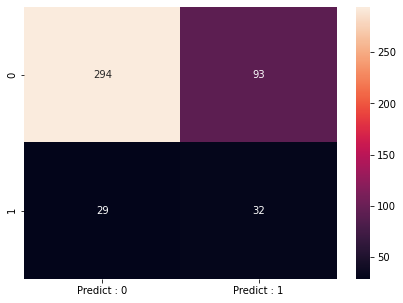

In [197]:
print("Score:{}".format(KNN_best.score(X_test, y_test)))
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ["Predict : 0","Predict : 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
chart_png(plt,"KNN - Confusion matrix")
plt.show()

#### Random forest classifier

In [199]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 90, random_state=1,max_features=19)
rfcl.fit(X,y)

RandomForestClassifier(max_features=19, n_estimators=90, random_state=1)

#### Cross validation for the Random forest classifier

In [200]:


kvalues =[3,5,7,10]
for k in kvalues:
    kfold = KFold(n_splits=k, random_state=None, shuffle=True) 
    kfold.get_n_splits(X)
    print("===========================================================================")
    print("KFold for Random Forest value:", k)

    for train_index, valid_index in kfold.split(X,y):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        rfcl.fit(X_train, y_train)
        y_pred_valid =  rfcl.predict(X_valid)
        y_pred_train =  rfcl.predict(X_train)
        
        result_metrics_train = classification_report(y_train, y_pred_train, output_dict=True)
        result_metrics_valid = classification_report(y_valid, y_pred_valid, output_dict=True)

        print("==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value", k)
        classification_report_csv(result_metrics_train,"KFold - RF - Training Data with K - "+ str(k))
        print("\n")
        print("==> Result Matrix after using KFolds on RandomForestClassifier Validation Data with k value", k)
        classification_report_csv(result_metrics_valid,"KFold - RF - Validation Data with K - "+str(k))
        print("\n")

KFold for Random Forest value: 3
==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value 3
              precision    recall  f1-score      support
0              0.997012  0.999002  0.998006  1002.000000
1              0.999017  0.997056  0.998035  1019.000000
accuracy       0.998021  0.998021  0.998021     0.998021
macro avg      0.998014  0.998029  0.998021  2021.000000
weighted avg   0.998023  0.998021  0.998021  2021.000000


==> Result Matrix after using KFolds on RandomForestClassifier Validation Data with k value 3
              precision    recall  f1-score      support
0              0.938398  0.889105  0.913087   514.000000
1              0.891221  0.939638  0.914789   497.000000
accuracy       0.913947  0.913947  0.913947     0.913947
macro avg      0.914810  0.914371  0.913938  1011.000000
weighted avg   0.915207  0.913947  0.913924  1011.000000


==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value 3
 

==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value 7
              precision    recall  f1-score      support
0              0.996942  0.996180  0.996561  1309.000000
1              0.996127  0.996899  0.996513  1290.000000
accuracy       0.996537  0.996537  0.996537     0.996537
macro avg      0.996534  0.996540  0.996537  2599.000000
weighted avg   0.996537  0.996537  0.996537  2599.000000


==> Result Matrix after using KFolds on RandomForestClassifier Validation Data with k value 7
              precision    recall  f1-score     support
0              0.899038  0.903382  0.901205  207.000000
1              0.911111  0.907080  0.909091  226.000000
accuracy       0.905312  0.905312  0.905312    0.905312
macro avg      0.905075  0.905231  0.905148  433.000000
weighted avg   0.905340  0.905312  0.905321  433.000000


==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value 7
              precision    recall  f1-sc

==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value 10
              precision    recall  f1-score      support
0              0.998514  0.992614  0.995556  1354.000000
1              0.992769  0.998545  0.995649  1375.000000
accuracy       0.995603  0.995603  0.995603     0.995603
macro avg      0.995642  0.995580  0.995602  2729.000000
weighted avg   0.995620  0.995603  0.995603  2729.000000


==> Result Matrix after using KFolds on RandomForestClassifier Validation Data with k value 10
              precision    recall  f1-score     support
0              0.953947  0.895062  0.923567  162.000000
1              0.887417  0.950355  0.917808  141.000000
accuracy       0.920792  0.920792  0.920792    0.920792
macro avg      0.920682  0.922708  0.920688  303.000000
weighted avg   0.922988  0.920792  0.920887  303.000000


==> Result Matrix after using KFolds on RandomForestClassifier Training Data with k value 10
              precision    recall  f1

### Building learning curve to understand how the model performs on trainning and validation data

In [201]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.01,1.0,10)  # 5 times 5*3 = 15

train_sizes, train_accuracy, test_accuracy = learning_curve(rfcl, X, y, 
                            train_sizes = train_sizes, 
                            scoring = 'accuracy',
                                                 cv=10, shuffle=True)


print("Trainning data Sizes")
print("\n")
print(train_sizes)
print("\n")
print("Trainning Accuracy for each data size with in each fold")
print("\n")
print(train_accuracy)
print("\n")
print("Validation data accuracy for each data size with in each fold")
print("\n")
print(test_accuracy)


train_scores_mean=np.mean(train_accuracy, axis=1)

test_scores_mean = np.mean(test_accuracy, axis=1)





Trainning data Sizes


[  27  327  627  927 1227 1527 1827 2127 2427 2728]


Trainning Accuracy for each data size with in each fold


[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.         0.99388379 1.         0.9969419  1.         1.
  1.         1.         1.         1.        ]
 [1.         0.99521531 0.9984051  0.9984051  1.         0.9984051
  1.         0.9984051  0.99521531 1.        ]
 [1.         0.99676375 0.9978425  0.9978425  1.         0.99892125
  0.99892125 0.99568501 0.99460626 0.99568501]
 [1.         0.99755501 0.99755501 0.99755501 0.99837001 0.99755501
  0.99837001 0.99511002 0.99592502 0.99674002]
 [0.99803536 0.99607073 0.99803536 0.99607073 0.99803536 0.99607073
  0.99803536 0.99541585 0.99476097 0.99672561]
 [0.99835796 0.99452655 0.99781062 0.99616858 0.99835796 0.99616858
  0.99835796 0.99507389 0.99507389 0.99671593]
 [0.99764927 0.99435825 0.99670898 0.99576869 0.99811942 0.99623883
  0.99717

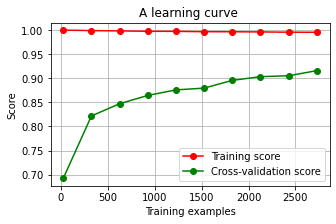

In [202]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve ')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
ax.grid()

ax.plot(train_sizes,train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes,test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")
chart_png(plt,"Cross Validation - Learning Curve for Random Forest")
plt.show()


#### Using Grid Search CV to find out best parameters

In [203]:
param_grid =param_grid = { 
    'n_estimators': [30,50,90],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(3,24,1),
    'criterion' :['gini', 'entropy']
}
kff_rfcl = KFold(n_splits=10, random_state=None, shuffle=True)
rfcl_grid_cv = RandomForestClassifier(random_state=42)
grid_search_cv_rfcl= GridSearchCV(rfcl_grid_cv,param_grid,cv=kff_rfcl)
grid_search_cv_rfcl.fit(X,y)
print("Best Params")
print(grid_search_cv_rfcl.best_params_,grid_search_cv_rfcl.best_score_)

Best Params
{'criterion': 'gini', 'max_depth': 16, 'max_features': 'log2', 'n_estimators': 90} 0.9310643564356436


#### Using the best parameters obtained above for modelling

In [204]:

rfcl_best = RandomForestClassifier(n_estimators = 90, random_state=42,max_features='log2',criterion='gini',max_depth=16)
rfcl_best.fit(X,y)

RandomForestClassifier(max_depth=16, max_features='log2', n_estimators=90,
                       random_state=42)

In [205]:
feature_scores = pd.Series(rfcl_best.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_scores

Marital_Status            0.115908
Recency                   0.107326
MntGoldProds              0.083484
MntMeatProducts           0.076242
Customer_duration_days    0.072104
Income                    0.070344
MntWines                  0.063461
NumStorePurchases         0.061097
MntFruits                 0.040300
Teenhome                  0.039322
Age                       0.038439
MntFishProducts           0.038423
MntSweetProducts          0.036062
NumCatalogPurchases       0.033479
NumWebPurchases           0.027412
NumWebVisitsMonth         0.027407
NumDealsPurchases         0.026674
Education                 0.012719
AcceptedCmp5              0.010113
Kidhome                   0.007245
AcceptedCmp3              0.004361
AcceptedCmp1              0.004359
AcceptedCmp4              0.002464
AcceptedCmp2              0.001071
Complain                  0.000185
dtype: float64

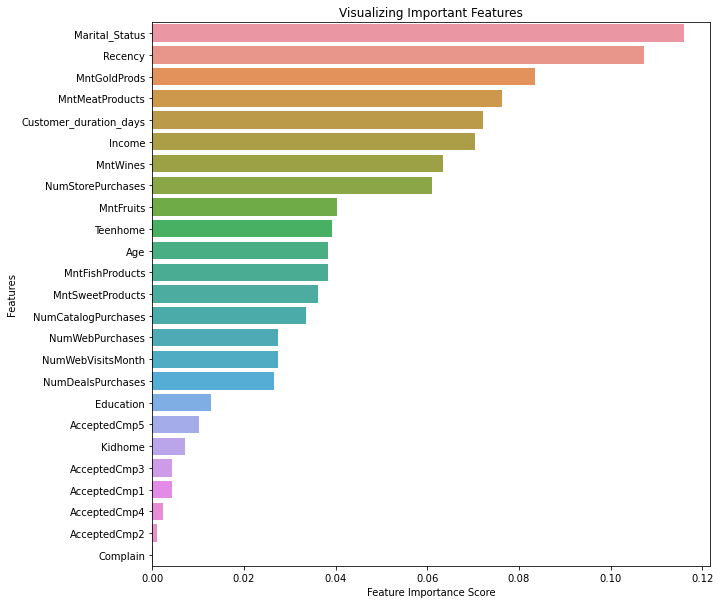

In [206]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(x=feature_scores, y=feature_scores.index,ax=ax)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph
chart_png(plt,"Feature_Importance_chart_Random Forest classifier")
plt.show()


In [207]:
y_pred_Random_forest =rfcl_best.predict(X_test)
result_metrics_test = classification_report(y_test, y_pred_Random_forest, output_dict=True)
print("Result Matrix after using Random Forest classifier on Test Data")
classification_report_csv(result_metrics_test,"Random_Forest_Testing_Classification_report")

Result Matrix after using Random Forest classifier on Test Data
              precision    recall  f1-score     support
0              0.934726  0.925065  0.929870  387.000000
1              0.553846  0.590164  0.571429   61.000000
accuracy       0.879464  0.879464  0.879464    0.879464
macro avg      0.744286  0.757614  0.750649  448.000000
weighted avg   0.882865  0.879464  0.881064  448.000000


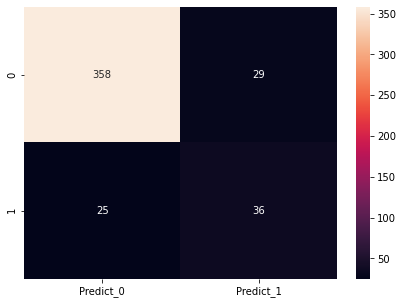

In [208]:
cm_rfcl=metrics.confusion_matrix(y_test, y_pred_Random_forest,labels=[0,1])

df_cm_rfcl = pd.DataFrame(cm_rfcl, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict_0","Predict_1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_rfcl, annot=True ,fmt='g')
chart_png(plt,"Random Forest Classifier - Confusion matrix")
plt.show()